In [1]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

Downloading the data

In [2]:
tf.keras.datasets.mnist.load_data(path="V:\github\mnist-cnn\data\mnist.npz");

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

<h2>Displaying the data</h2>

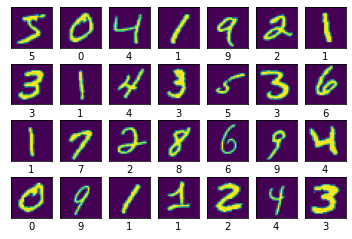

In [5]:
for i in range(28):
    plt.subplot(4,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(y_train[i])
plt.show()

<h2>Trying out a simple model</h2>

Converting the labels to categories, needded for the accuracy measure

In [6]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [7]:
X_train = X_train.astype("float32") /255
X_test = X_test.astype("float32") /255

In [8]:
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [9]:
y_train.shape

(60000, 10)

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28,1)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer="adam", metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)


Epoch 1/10
1688/1688 [==============================] - 8s 4ms/step - loss: 0.1927 - accuracy: 0.9443 - val_loss: 0.0764 - val_accuracy: 0.9810
Epoch 2/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0723 - accuracy: 0.9780 - val_loss: 0.0680 - val_accuracy: 0.9832
Epoch 3/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0510 - accuracy: 0.9840 - val_loss: 0.0649 - val_accuracy: 0.9817
Epoch 4/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0391 - accuracy: 0.9878 - val_loss: 0.0697 - val_accuracy: 0.9812
Epoch 5/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0291 - accuracy: 0.9906 - val_loss: 0.0726 - val_accuracy: 0.9817
Epoch 6/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0223 - accuracy: 0.9929 - val_loss: 0.0821 - val_accuracy: 0.9813
Epoch 7/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0175 - accuracy: 0.9943 - val_loss: 0.0830 - val_accuracy:

In [11]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.09067068994045258
Test accuracy: 0.9801999926567078


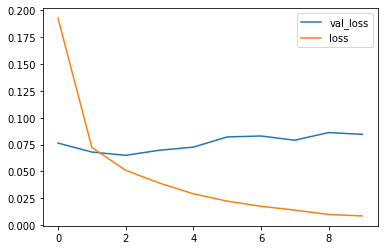

In [20]:
plt.plot(history.history["val_loss"], label ="val_loss")
plt.plot(history.history["loss"], label="loss")
plt.legend()

The very simple model performs great, but it suffers from significant overfitting.